## Análise de Redes de aeroportos
### Dataset
- Os dados foram extraídos do Kaggle com alguns ajustes feitos para a execução da atividade: https://www.kaggle.com/datasets/tylerx/flights-and-airports-data/data 
- A base consiste em voos entre aeroportos dos Estados Unidos, usaremos os campos OriginAirport(Aeroporto de partida) e DestAirport(Aeroporto de destino) para a análise
- Os aeroportos serão os nós do nosso grafos e as rotas(conexões entre os aeroportos que indicam a existência de um voo direto entre dois pontos) as arestas

In [1]:
#Importação das bibliotecas
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pyvis import network as net
from networkx.algorithms import community
import random
from IPython.display import display, HTML

In [2]:
#Carregando o dataset
flights = pd.read_csv('../data/flights_names.csv')
airports = pd.read_csv('../data/airports.csv')

In [3]:
flights.head()

,DayofMonth,DayOfWeek,Carrier,airport_id,DepDelay,ArrDelay,OriginAirport,DestAirport
0,19,5,DL,13303,-3,1,Detroit Metro Wayne County,Miami International
1,19,5,DL,12478,0,-8,Salt Lake City International,John F. Kennedy International
2,19,5,DL,14869,-4,-15,Portland International,Salt Lake City International
3,19,5,DL,11433,28,24,Lambert-St. Louis International,Detroit Metro Wayne County
4,19,5,DL,12892,-6,-11,Cincinnati/Northern Kentucky International,Los Angeles International


In [4]:
airports.head()

,airport_id,city,state,name
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport


In [5]:
G = nx.from_pandas_edgelist(flights, source='OriginAirport', target='DestAirport', create_using=nx.DiGraph())

In [6]:
nx.write_graphml(G, 'airports-network.graphml')

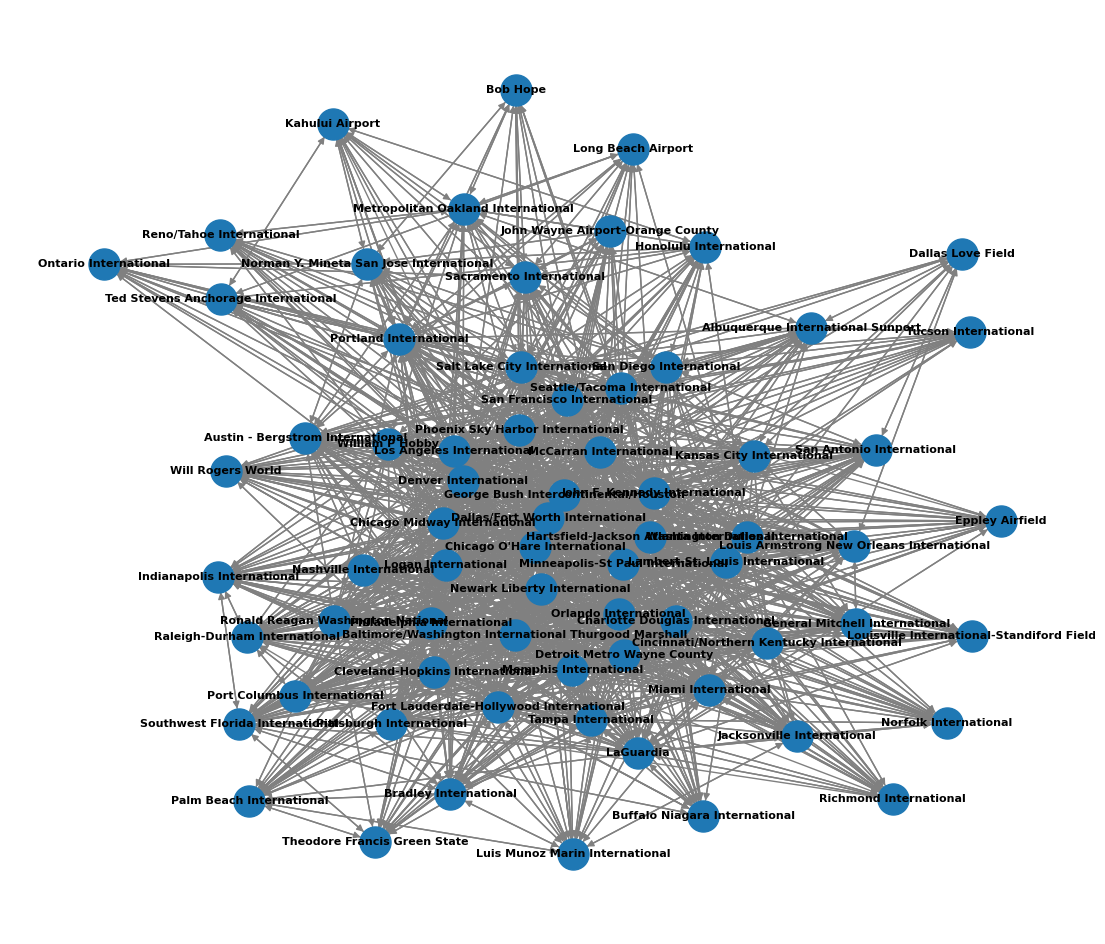

In [7]:
pos = nx.spring_layout(G)

fig, ax = plt.subplots(figsize=(14, 12))

nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color="black", font_weight='bold', edge_color="gray", ax=ax)

plt.show()

### Calculate Degree
Who has the most number of connections in the network?

In [8]:
nx.degree(G)

DiDegreeView({'Detroit Metro Wayne County': 106, 'Miami International': 80, 'Salt Lake City International': 94, 'John F. Kennedy International': 108, 'Portland International': 74, 'Lambert-St. Louis International': 87, 'Cincinnati/Northern Kentucky International': 80, 'Los Angeles International': 108, 'Hartsfield-Jackson Atlanta International': 126, 'Austin - Bergstrom International': 70, 'Ronald Reagan Washington National': 81, 'Phoenix Sky Harbor International': 118, 'Minneapolis-St Paul International': 116, 'Dallas/Fort Worth International': 124, 'Jacksonville International': 48, 'LaGuardia': 77, 'San Francisco International': 97, 'Orlando International': 100, 'McCarran International': 118, 'Palm Beach International': 38, 'Memphis International': 77, 'Fort Lauderdale-Hollywood International': 86, 'Seattle/Tacoma International': 98, 'Denver International': 124, 'Sacramento International': 50, 'John Wayne Airport-Orange County': 36, 'Tampa International': 86, 'Kansas City Internationa

In [9]:
degrees = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degrees)

In [10]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
8,Hartsfield-Jackson Atlanta International,126
23,Denver International,124
13,Dallas/Fort Worth International,124
35,Chicago O'Hare International,123
33,George Bush Intercontinental/Houston,120
...,...,...
62,Kahului Airport,27
66,Long Beach Airport,26
69,Ontario International,26
68,Bob Hope,22


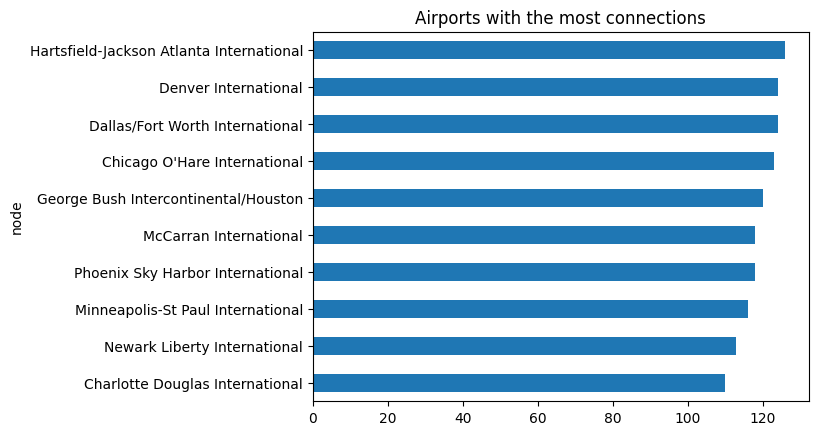

In [11]:
num_nodes_to_inspect = 10

ax = degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh')

ax.get_legend().remove()

ax.invert_yaxis()

ax.set_title('Airports with the most connections')

plt.show()

### Calculate Betweenness Centrality Scores
Who connects the most other nodes in the network?

In [12]:
nx.betweenness_centrality(G)

{'Detroit Metro Wayne County': 0.010093852814680565,
 'Miami International': 0.0034277564547492735,
 'Salt Lake City International': 0.013116612148662388,
 'John F. Kennedy International': 0.02067271166684944,
 'Portland International': 0.007034522355726602,
 'Lambert-St. Louis International': 0.005627053742568737,
 'Cincinnati/Northern Kentucky International': 0.002453174237426553,
 'Los Angeles International': 0.01497478740633381,
 'Hartsfield-Jackson Atlanta International': 0.02903778352212746,
 'Austin - Bergstrom International': 0.0047978449009147255,
 'Ronald Reagan Washington National': 0.003873587465185673,
 'Phoenix Sky Harbor International': 0.025602715446013762,
 'Minneapolis-St Paul International': 0.017535638149935844,
 'Dallas/Fort Worth International': 0.029481541880603725,
 'Jacksonville International': 0.0006533105824873239,
 'LaGuardia': 0.004635646613554912,
 'San Francisco International': 0.014755059829132153,
 'Orlando International': 0.009168957968307011,
 'McCarr

In [13]:
betweenness_centrality = nx.betweenness_centrality(G)

In [14]:
nx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

In [15]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
23,Denver International,0.029825
13,Dallas/Fort Worth International,0.029482
8,Hartsfield-Jackson Atlanta International,0.029038
33,George Bush Intercontinental/Houston,0.028830
35,Chicago O'Hare International,0.026397
...,...,...
60,Reno/Tahoe International,0.000115
68,Bob Hope,0.000110
59,Eppley Airfield,0.000104
54,Richmond International,0.000054


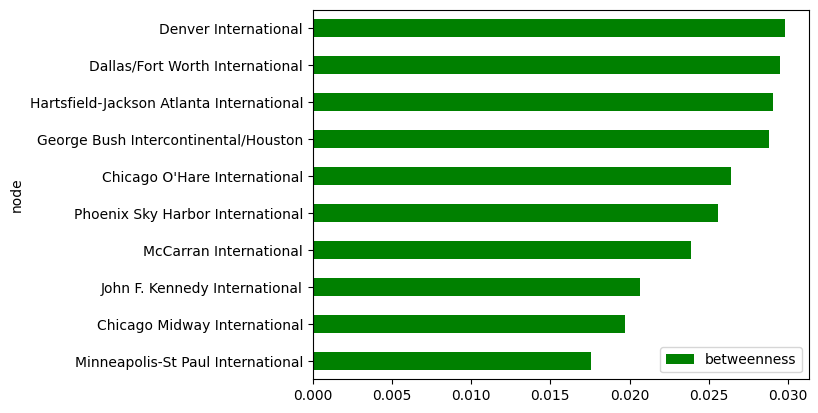

In [16]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

### Communities
Who forms distinct communities within this network?

In [17]:
communities = community.greedy_modularity_communities(G)

In [18]:
communities

[frozenset({'Baltimore/Washington International Thurgood Marshall',
            'Bradley International',
            'Buffalo Niagara International',
            'Charlotte Douglas International',
            "Chicago O'Hare International",
            'Cincinnati/Northern Kentucky International',
            'Cleveland-Hopkins International',
            'Dallas Love Field',
            'Detroit Metro Wayne County',
            'Fort Lauderdale-Hollywood International',
            'General Mitchell International',
            'George Bush Intercontinental/Houston',
            'Hartsfield-Jackson Atlanta International',
            'Indianapolis International',
            'Jacksonville International',
            'John F. Kennedy International',
            'Kansas City International',
            'LaGuardia',
            'Lambert-St. Louis International',
            'Logan International',
            'Louis Armstrong New Orleans International',
            'Louisville Internationa

In [19]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [20]:
nx.set_node_attributes(G, modularity_class, 'modularity_class')

In [21]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [22]:
communities_df

,node,modularity_class
69,Ontario International,1
62,Kahului Airport,1
53,Ted Stevens Anchorage International,1
25,John Wayne Airport-Orange County,1
24,Sacramento International,1
...,...,...
1,Miami International,0
37,Logan International,0
38,Baltimore/Washington International Thurgood Ma...,0
39,Norfolk International,0


In [23]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
69,Ontario International,1
62,Kahului Airport,1
53,Ted Stevens Anchorage International,1
25,John Wayne Airport-Orange County,1
24,Sacramento International,1
23,Denver International,1
22,Seattle/Tacoma International,1
57,Chicago Midway International,1
42,Albuquerque International Sunport,1
59,Eppley Airfield,1


In [24]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
51,Pittsburgh International,0
44,Raleigh-Durham International,0
47,Newark Liberty International,0
48,General Mitchell International,0
49,Louisville International-Standiford Field,0
58,Theodore Francis Green State,0
52,Cleveland-Hopkins International,0
54,Richmond International,0
55,Luis Munoz Marin International,0
56,Bradley International,0


### All Network Metrics

In [25]:
dict(G.nodes(data=True))

{'Detroit Metro Wayne County': {'degree': 106,
  'betweenness': 0.010093852814680565,
  'modularity_class': 0},
 'Miami International': {'degree': 80,
  'betweenness': 0.0034277564547492735,
  'modularity_class': 0},
 'Salt Lake City International': {'degree': 94,
  'betweenness': 0.013116612148662388,
  'modularity_class': 1},
 'John F. Kennedy International': {'degree': 108,
  'betweenness': 0.02067271166684944,
  'modularity_class': 0},
 'Portland International': {'degree': 74,
  'betweenness': 0.007034522355726602,
  'modularity_class': 1},
 'Lambert-St. Louis International': {'degree': 87,
  'betweenness': 0.005627053742568737,
  'modularity_class': 0},
 'Cincinnati/Northern Kentucky International': {'degree': 80,
  'betweenness': 0.002453174237426553,
  'modularity_class': 0},
 'Los Angeles International': {'degree': 108,
  'betweenness': 0.01497478740633381,
  'modularity_class': 1},
 'Hartsfield-Jackson Atlanta International': {'degree': 126,
  'betweenness': 0.0290377835221274

In [26]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,betweenness,modularity_class
Detroit Metro Wayne County,106.0,0.010094,0.0
Miami International,80.0,0.003428,0.0
Salt Lake City International,94.0,0.013117,1.0
John F. Kennedy International,108.0,0.020673,0.0
Portland International,74.0,0.007035,1.0
...,...,...,...
Will Rogers World,46.0,0.001067,0.0
Long Beach Airport,26.0,0.000311,1.0
Dallas Love Field,20.0,0.000270,0.0
Bob Hope,22.0,0.000110,1.0


In [27]:
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,betweenness,modularity_class
Denver International,124.0,0.029825,1.0
Dallas/Fort Worth International,124.0,0.029482,1.0
Hartsfield-Jackson Atlanta International,126.0,0.029038,0.0
George Bush Intercontinental/Houston,120.0,0.028830,0.0
Chicago O'Hare International,123.0,0.026397,0.0
...,...,...,...
Reno/Tahoe International,28.0,0.000115,1.0
Bob Hope,22.0,0.000110,1.0
Eppley Airfield,37.0,0.000104,1.0
Richmond International,36.0,0.000054,0.0


In [28]:
# Seleciona um subconjunto de aeroportos
num_airports = 10
selected_airports = airports.sample(num_airports)  # Seleção aleatória

# Extraí os identificadores e nomes dos aeroportos
airport_ids = selected_airports['airport_id'].tolist()
airport_names = selected_airports['name'].tolist()

print(airport_ids)
print(airport_names)

[14098, 13303, 10685, 12478, 11726, 11066, 10397, 11995, 10299, 13388]
['Newport News/Williamsburg International', 'Miami International', 'Central Illinois Regional', 'John F. Kennedy International', 'Forbes Field', 'Port Columbus International', 'Hartsfield-Jackson Atlanta International', 'Piedmont Triad International', 'Ted Stevens Anchorage International', 'Mammoth Lakes Airport']


In [31]:
def generate_edge():
    s = random.choice(airport_ids)
    d = random.choice(airport_ids)
    return (s, d)

def generate_size_node():
    v = random.randint(5, 20)
    return v

# Cria a rede
g_sizes = net.Network(height='600px', width='90%', bgcolor='white', font_color='red')

# Adiciona os nós com nomes dos aeroportos e tamanhos diferentes
for i, airport_id in enumerate(airport_ids):
    val = generate_size_node()
    g_sizes.add_node(airport_id, label=airport_names[i], value=val)

# Gera e adiciona as arestas
chosen_set = []
while len(chosen_set) < 20:
    eg = generate_edge()
    if eg[0] != eg[1] and eg not in chosen_set:
        chosen_set.append(eg)
        g_sizes.add_edge(eg[0], eg[1])

# Salva o gráfico como um arquivo HTML
g_sizes.save_graph('Airport_Graph.html')

# Exibe o gráfico
display(HTML('Airport_Graph.html'))